In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
x2 = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import sklearn
svm_clf = Pipeline((
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge"))
    
))
print("Sklearn verion is {}".format(sklearn.__version__))

Sklearn verion is 0.22.2.post1


In [5]:
svm_clf.fit(x2,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [6]:
def dismap(clf,x2_,y_):
    for ii in np.arange(0.0,7.0,0.1):
        for jj in np.arange(0.0,3.,0.1):
            y_ = clf.predict([[ii,jj]])
            if y_ == 0:
                plt.scatter(ii,jj,c= '#00CED1')
            else:
                plt.scatter(ii,jj,c = '#DC143C') 
    for ii in range(len(x2)):
        if y[ii]== 0:
            plt.scatter(x2_[ii,0],x2_[ii,1],c= 'white')
        else:
            plt.scatter(x2_[ii,0],x2_[ii,1],c = 'black')   
    plt.show()

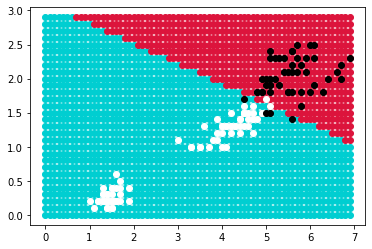

In [7]:
dismap(svm_clf,x2,y)

# 非线性SVM分类
### 卫星数据集

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
Polynomial_svm_clf = Pipeline((
    ("polynomial_process",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss="hinge",random_state=42))
))

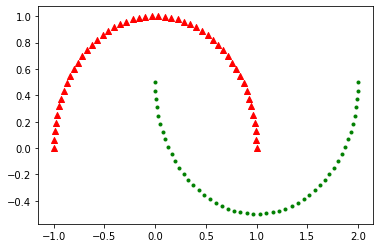

In [9]:
make_moons_ = make_moons()
for ii in range(len(make_moons_[1])):
    if make_moons_[1][ii] == 0:
        plt.scatter(make_moons_[0][ii,0],make_moons_[0][ii,1],c='red',marker="^")
    else:
        plt.scatter(make_moons_[0][ii,0],make_moons_[0][ii,1],c='green',marker='.')    
plt.show()

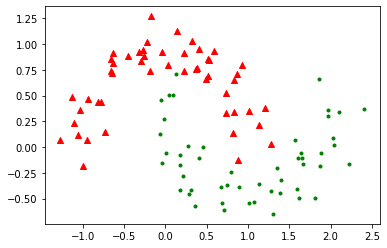

In [10]:
x, y = make_moons(n_samples=100, noise=0.15, random_state=42)
for ii in range(len(y)):
    if y[ii] == 0:
        plt.scatter(x[ii,0],x[ii,1],c='red',marker="^")
    else:
        plt.scatter(x[ii,0],x[ii,1],c='green',marker='.')    
plt.show()

In [11]:
Polynomial_svm_clf.fit(x,y)

/home/xiaotongfeng/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(memory=None,
         steps=[('polynomial_process',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

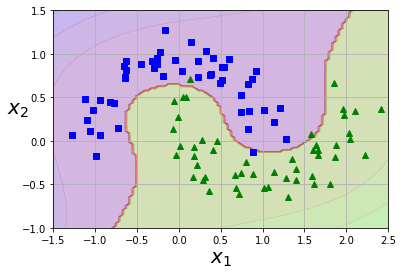

In [12]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_predictions(Polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [13]:
from sklearn.svm import SVC
poly_kernel_svc_clf = Pipeline((
    ("scalar",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=10,coef0=100, C = 5))
))
poly_kernel_svc_clf.fit(x,y)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

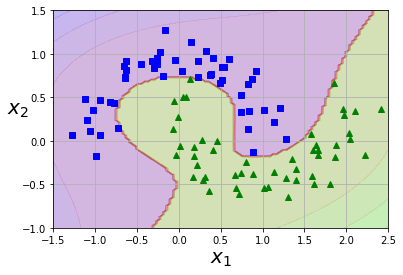

In [14]:
plot_predictions(poly_kernel_svc_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
para_search = [{'svm_clf__degree':range(3,15,1)},{'svm_clf__coef0':range(1,200,20)},{'svm_clf__C':range(1,10,2)}]
grid_search = GridSearchCV(poly_kernel_svc_clf,param_grid=para_search,cv = 5, scoring = 'neg_mean_squared_error')

In [17]:
grid_search.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scalar',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svm_clf',
                                        SVC(C=5, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=100,
                                            decision_function_shape='ovr',
                                            degree=10, gamma='scale',
                                            kernel='poly', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0

In [18]:
grid_search.best_params_

{'svm_clf__degree': 4}

# 高斯RBF
$$\normalsize \phi \gamma (x,l) = \exp(-\gamma||x-l||^2)$$

In [20]:
rbf_kernel_svc_clf = Pipeline((
    ("scalar",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
))
rbf_kernel_svc_clf.fit(x,y)

Pipeline(memory=None,
         steps=[('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

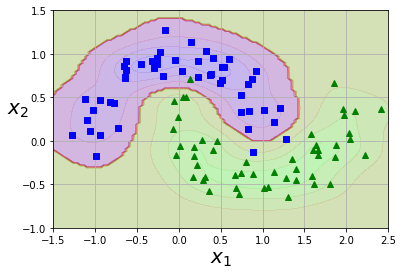

In [21]:
plot_predictions(rbf_kernel_svc_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()